In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

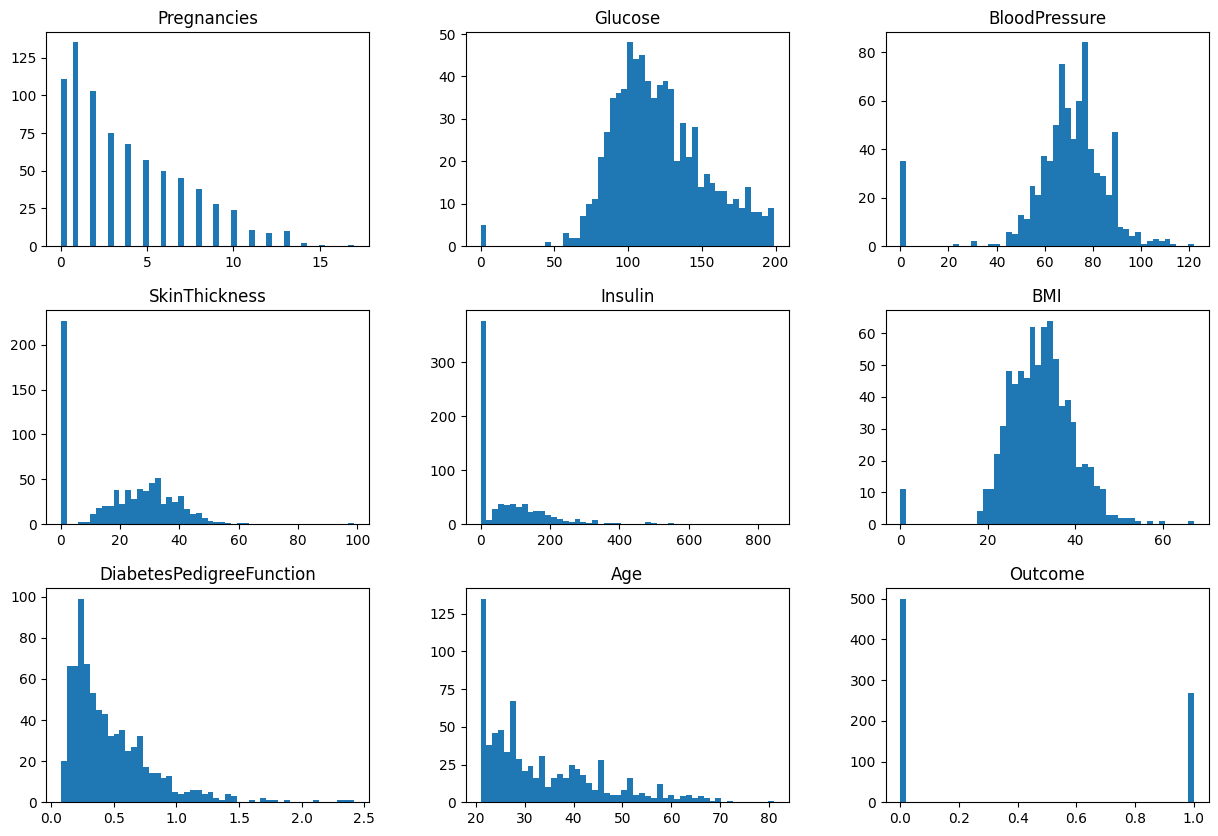

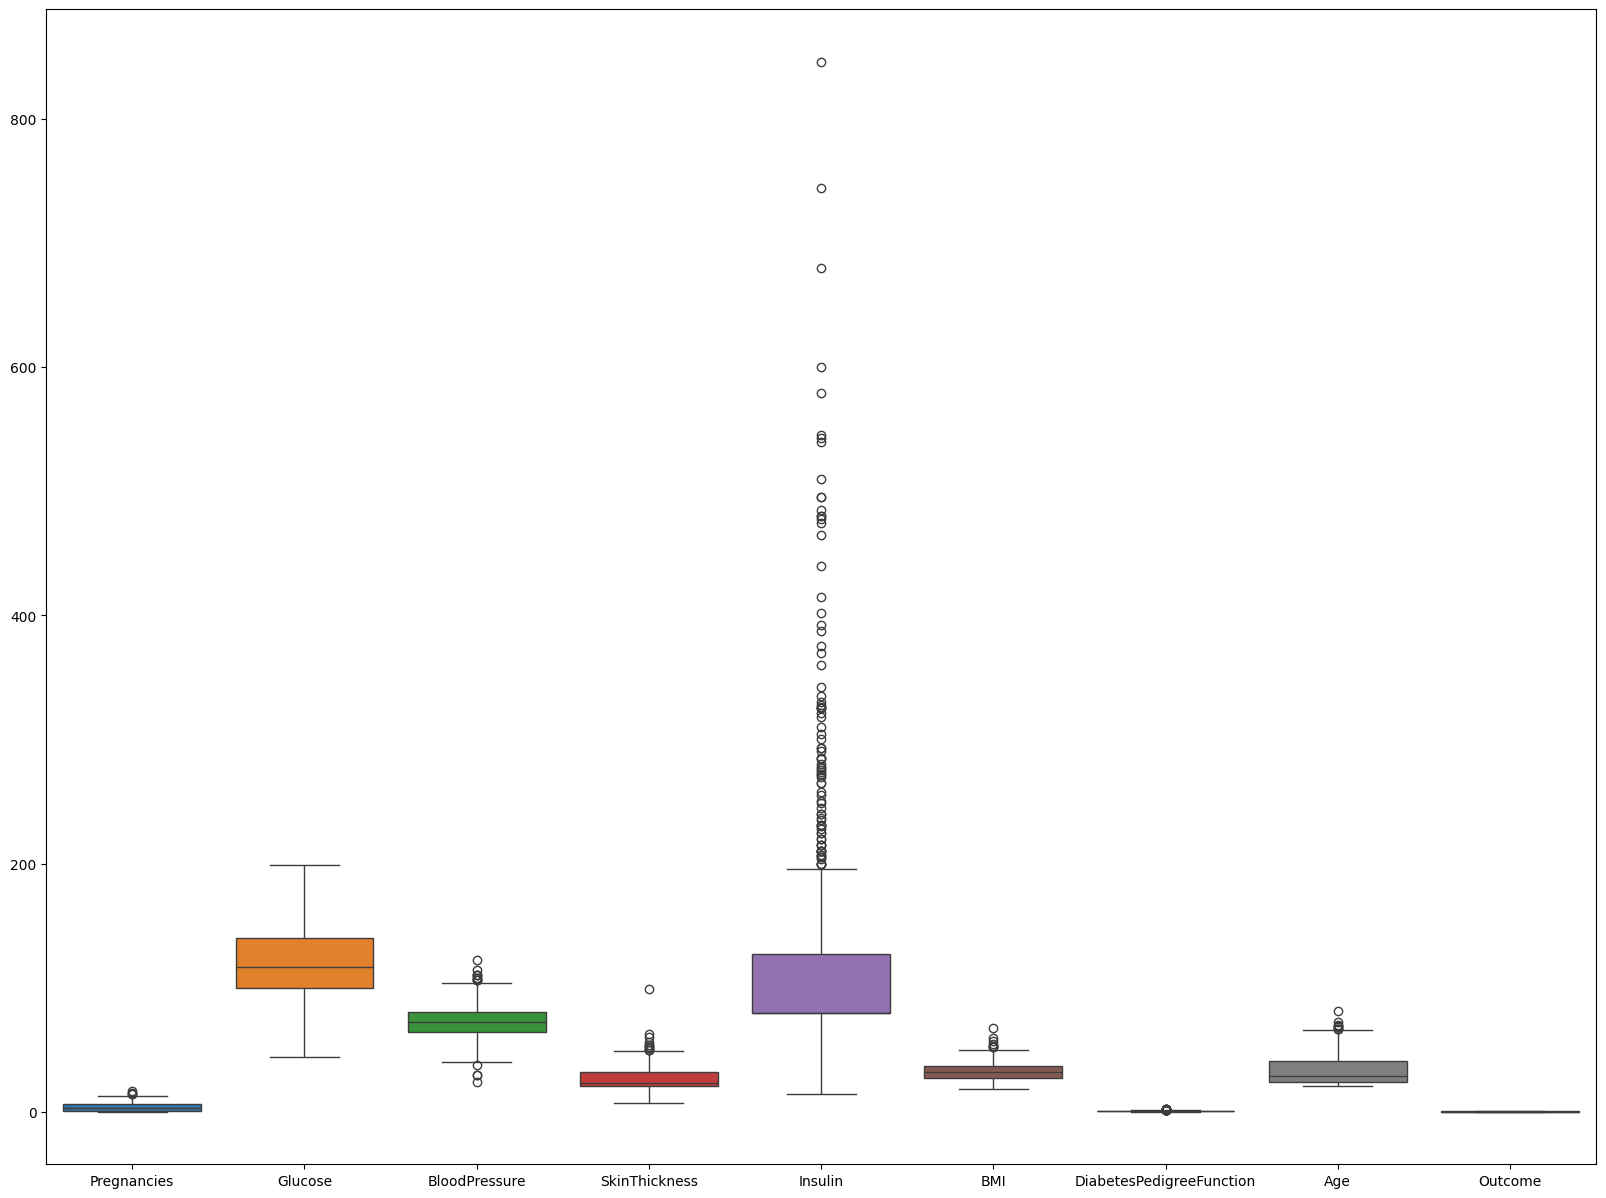

In [11]:
df = pd.read_csv("/config/workspace/Dataset/diabetes.csv")
df.head()

# %%
## One thing to notice is that the glucose, Bloodpressure, Skinthickness, Insulin and BMI have min value of 0, which cannot be the case. So, further we need to replace the 0 with either mean or median
df.describe()

# %%
df.info()

# %%
df.isnull().sum()

# %%
# Visualizing the distibution of the numerical values
df.hist(bins = 50, figsize = (15,10),grid=False)

# %%
# Replacing 0's from the following variables with the mean()

df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].mean())
df["BMI"] = df["BMI"].replace(0,df["BMI"].mean())


# %%
df.describe()

# %%
# Checking outliers
plt.subplots(figsize = (20,15))
sns.boxplot(df)

# %%



In [12]:
## Independent and dependent variables
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]


# %%
## train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,random_state=0)

# %%
X_train.shape, X_test.shape

# %%
Y_train.shape , Y_test.shape

# %%
## standardize the dataset to remove outlier using standard scaler where mean =0, std = -1, value =-3 to +3
import pickle
def scaler_standard(X_train,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Saving the file
    file = open("/config/workspace/Model/standardScaler.pkl","wb")
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled,X_test_scaled

# %%
X_train_scaled,X_test_scaled = scaler_standard(X_train,X_test)

# %%
X_test_scaled

# %%
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,Y_train)


# %%
y_pred = log_reg.predict(X_test_scaled)

# %%
confusion_matrix(Y_test,y_pred)

# %%
accuracy_score(Y_test,y_pred)




0.796875

In [14]:

# %%
## Hyperparameter Tuning
### Gridsearch CV
from sklearn.model_selection import GridSearchCV
#import warnings
#warings.filterwarnings("ignore")

parameters = {"penalty" : ["l2","l1"],
"C": np.logspace(-3,3,7),
"solver" : ["newton-cg","lbfgs","liblinear"]
}



# %%
log_reg_gridcv = LogisticRegression()
clf = GridSearchCV(log_reg_gridcv,param_grid=parameters,scoring="accuracy",cv = 10)
clf.fit(X_train_scaled,Y_train)

# %%


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

In [16]:
clf.best_params_

# %%
clf.best_score_

# %%
y_pred_gridcv = clf.predict(X_test_scaled)

# %%
## Confusion matrix
print(confusion_matrix(Y_test,y_pred_gridcv))

# %%
## accuracy Score
print(accuracy_score(Y_test , y_pred_gridcv))

# %%
## Precision and and recall
print(classification_report(Y_test,y_pred_gridcv))

# %%
import pickle
file = open("/config/workspace/Model/modelforprediction.pkl","wb")
pickle.dump(clf,file)
file.close()

[[117  13]
 [ 26  36]]
0.796875
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192

